# relationship between traffic intensity and GDP

In [1]:
from utils import *


## Step1: datasets findings


In [2]:
# TRAFFIC: Traffic_common_data_cleaned.csv
df_traffic_common = pd.read_csv("Traffic_common_data_cleaned.csv", low_memory=False)
print("Traffic_common_data_cleaned.csv 数据预览:")
df_traffic_common.head()


FileNotFoundError: [Errno 2] No such file or directory: 'Traffic_common_data_cleaned.csv'

In [10]:
df_traffic_common.columns

Index(['count_point_id', 'direction_of_travel', 'year', 'count_date', 'month',
       'day', 'hour', 'region_id', 'region_name', 'region_ons_code',
       'local_authority_id', 'local_authority_name', 'local_authority_code',
       'road_name', 'road_category', 'road_type', 'easting', 'northing',
       'latitude', 'longitude', 'pedal_cycles', 'two_wheeled_motor_vehicles',
       'cars_and_taxis', 'buses_and_coaches', 'LGVs', 'HGVs_2_rigid_axle',
       'HGVs_3_rigid_axle', 'HGVs_4_or_more_rigid_axle',
       'HGVs_3_or_4_articulated_axle', 'HGVs_5_articulated_axle',
       'HGVs_6_articulated_axle', 'all_HGVs', 'all_motor_vehicles'],
      dtype='object')

In [11]:
print("df_traffic_common.csv 的形状:", df_traffic_common.shape)


df_traffic_common.csv 的形状: (2074248, 33)


In [ ]:
# GDP: Economic_common_data.csv
df_gdp_common = pd.read_csv("Economic_common_data.csv", low_memory=False)
print("\nEconomic_common_data.csv 数据预览:")
df_gdp_common.head()



Economic_common_data.csv 数据预览:


,ITL,ITL code,Region name,1998,1999,2000,2001,2002,2003,2004,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,ITL3,TLC12,South Teesside,3159,3262,3355,3359,3477,3742,3937,...,4819,4986,5175,5253,5295,5603,5667,5307,5771,6324
1,ITL3,TLC13,Darlington,1675,1722,1855,1962,2088,2220,2367,...,2589,2858,3020,2882,2878,2855,2829,2584,2854,3036
2,ITL3,TLC14,Durham CC,5382,5669,5839,6014,6322,6736,7249,...,9136,9180,9324,9401,9719,10236,10664,10529,11265,12236
3,ITL3,TLC21,Northumberland,3473,3505,3573,3714,3986,4134,4422,...,5395,5564,5664,5845,6007,6119,6458,6011,6486,7349
4,ITL3,TLC23,Sunderland,3929,3884,4040,4268,4576,4775,5228,...,6863,7090,7292,7398,7754,7734,8137,7162,7492,8216


In [ ]:
print("df_gdp_common.csv 的形状:", df_gdp_common.shape)


df_gdhi_common.csv 的形状: (107, 28)


## Step2: cities with biggest traffic volumn


In [15]:
from utils import *

#### total all_motor_vehicles in different cities

In [7]:
# 获取车流量最高的前10个地区
top_areas = get_top_n_areas_by_traffic(df_traffic_common, 
                                       area_column='local_authority_name', 
                                       vehicle_column='all_motor_vehicles', 
                                       year_column='year', 
                                       top_n=10)

# 打印结果
print("\nTop 10 Areas by Total All Motor Vehicles:")
print(top_areas)



Top 10 Areas by Total All Motor Vehicles:
   local_authority_name  total_all_motor_vehicles
41                 Kent                81412882.0
38        Hertfordshire                71420277.0
32                Essex                67550315.0
45                Leeds                55409718.0
44           Lancashire                49938430.0
80        Staffordshire                40881874.0
94         Warwickshire                40477557.0
98          West Sussex                39803607.0
57     Northamptonshire                38281366.0
22           Derbyshire                35254207.0


## Step3: plot traffic colomns~GDP for each city

In [1]:
from utils import *

In [2]:
# 读取数据
df_traffic_common = pd.read_csv("Traffic_common_data_cleaned.csv", low_memory=False)
df_gdp_common = pd.read_csv("Economic_common_data.csv", low_memory=False)


In [ ]:

# 调用函数，分析 'Kent' 1997-2022 年的数据
plot_gdp_vs_traffic(df_gdp_common, df_traffic_common, local_authority_name='Kent', common_years=range(1997, 2023), traffic_column='all_HGVs')

# 也可以换成其他城市，如 'Manchester'，并更改时间范围
plot_gdp_vs_traffic(df_gdp_common, df_traffic_common, local_authority_name='Manchester', common_years=range(1997, 2019), traffic_column='all_HGVs')


图像已保存到 output/birmingham_traffic_trend.pdf


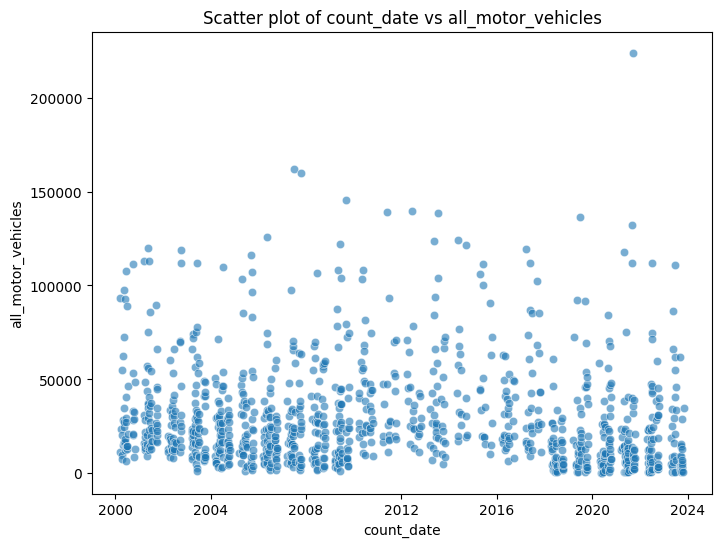

In [3]:
from utils import plot_traffic_trend

area_to_plot = "Birmingham"
plot_traffic_trend(df_traffic_common, area_to_plot, vehicle_column='all_motor_vehicles')

# 保存为 PDF
plt.savefig("output/birmingham_traffic_trend.pdf", format="pdf", bbox_inches='tight', dpi=300)
print("图像已保存到 output/birmingham_traffic_trend.pdf")


## Step4: seek for relationship

### 4.1 YOY/MOM

In [40]:
# all_motor_vehicles
df_filtered = df_traffic_common[df_traffic_common["local_authority_name"] == "Birmingham"].copy()
df_filtered["count_date"] = pd.to_datetime(df_filtered["count_date"])

df_grouped = df_filtered.groupby("count_date")["all_motor_vehicles"].sum().reset_index() # 按日期分组，计算all_motor_vehicles总和

df_grouped['YoY_change'] = df_grouped['all_motor_vehicles'].pct_change(12) * 100  # 同比变化率（按12个月计算）
df_grouped['MoM_change'] = df_grouped['all_motor_vehicles'].pct_change(1) * 100  # 环比变化率（按1个月计算）
df_grouped

,count_date,all_motor_vehicles,YoY_change,MoM_change
0,2000-03-17,93395.0,NaN,NaN
1,2000-03-21,11348.0,NaN,-87.849457
2,2000-03-22,23368.0,NaN,105.921748
3,2000-04-06,20052.0,NaN,-14.190346
4,2000-04-07,9390.0,NaN,-53.171753
...,...,...,...,...
1070,2023-10-09,28731.0,103.347725,495.337754
1071,2023-10-11,12900.0,-9.295458,-55.100762
1072,2023-10-12,6913.0,-55.534830,-46.410853
1073,2023-10-17,433.0,-0.459770,-93.736439


In [41]:
df_grouped[df_grouped["YoY_change"] > 1000]  # 只看同比变化超过1000%的点
df_grouped[df_grouped["MoM_change"] > 1000]  # 只看环比变化超过1000%的点



,count_date,all_motor_vehicles,YoY_change,MoM_change
178,2003-06-12,61631.0,184.328289,2096.400570
180,2003-06-18,18369.0,93.520860,1695.601173
293,2005-06-13,19486.0,37.341415,2160.556845
312,2005-09-27,28704.0,98.108910,1868.724280
317,2005-10-06,51262.0,1813.475177,1262.988567
354,2006-06-26,42669.0,668.949360,2401.113716
359,2006-07-05,45528.0,197.374265,1384.447343
378,2006-10-05,28575.0,-49.065987,1718.905156
398,2007-05-14,97618.0,1686.893648,1669.083001
426,2007-09-19,34216.0,-51.231471,1250.809317


In [42]:
print(df_grouped.dtypes)




count_date            datetime64[ns]
all_motor_vehicles           float64
YoY_change                   float64
MoM_change                   float64
dtype: object


In [ ]:
# print(df_grouped.head())  # 查看数据
# print(df_grouped.index)   # 查看索引是否已经是 count_date


            all_motor_vehicles  YoY_change  MoM_change quarter
count_date                                                    
2000-03-17             93395.0         NaN         NaN  2000Q1
2000-03-21             11348.0         NaN  -87.849457  2000Q1
2000-03-22             23368.0         NaN  105.921748  2000Q1
2000-04-06             20052.0         NaN  -14.190346  2000Q2
2000-04-07              9390.0         NaN  -53.171753  2000Q2


In [ ]:
df_grouped = df_grouped.set_index("count_date").resample("ME").sum()


In [44]:
print(df_grouped.head(12))  # 看看前12个月的数据

            all_motor_vehicles   YoY_change   MoM_change
count_date                                              
2000-03-31            128111.0     0.000000    18.072292
2000-04-30             92005.0     0.000000   548.296419
2000-05-31            522184.0   685.363193   951.789705
2000-06-30            367274.0   347.452449  1351.011871
2000-07-31             81427.0   199.754310   167.430488
2000-08-31                 0.0     0.000000     0.000000
2000-09-30             41219.0   -53.745619    -0.474639
2000-10-31            358243.0  1198.293433   351.332013
2000-11-30                 0.0     0.000000     0.000000
2000-12-31                 0.0     0.000000     0.000000
2001-01-31                 0.0     0.000000     0.000000
2001-02-28                 0.0     0.000000     0.000000


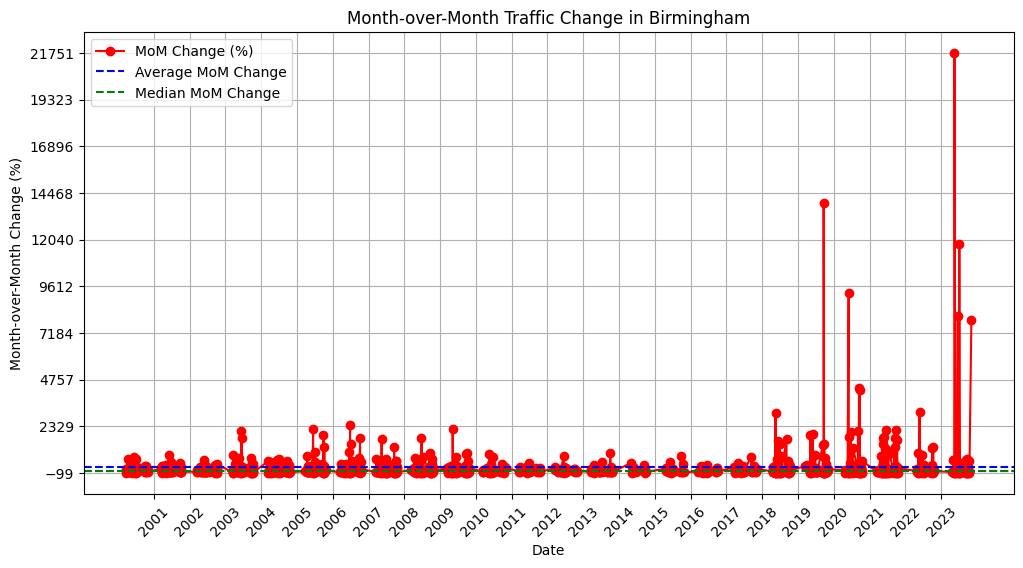

In [ ]:
# Month-over-Month Traffic Change in Birmingham
y_min = df_grouped["MoM_change"].min()
y_max = df_grouped["MoM_change"].max()

y_ticks = np.linspace(y_min, y_max, num=10)

years = pd.date_range(start=df_grouped["count_date"].min(), end=df_grouped["count_date"].max(), freq="YS")
plt.figure(figsize=(12, 6))
plt.plot(df_grouped["count_date"], df_grouped["MoM_change"], marker='o', linestyle='-', color='red', label="MoM Change (%)")
plt.axhline(0, color='black', linestyle='--')
plt.axhline(df_grouped["MoM_change"].mean(), color='blue', linestyle='--', label="Average MoM Change")
plt.axhline(df_grouped["MoM_change"].median(), color='green', linestyle='--', label="Median MoM Change")
plt.xticks(years, [str(y.year) for y in years], rotation=45)
plt.yticks(y_ticks)
plt.xlabel("Date")
plt.ylabel("Month-over-Month Change (%)")
plt.title("Month-over-Month Traffic Change in Birmingham")
plt.legend()
plt.grid(True)

# save as PDF
plt.savefig("output/birmingham_traffic_mom_change.pdf", format="pdf", bbox_inches='tight', dpi=300)

plt.show()



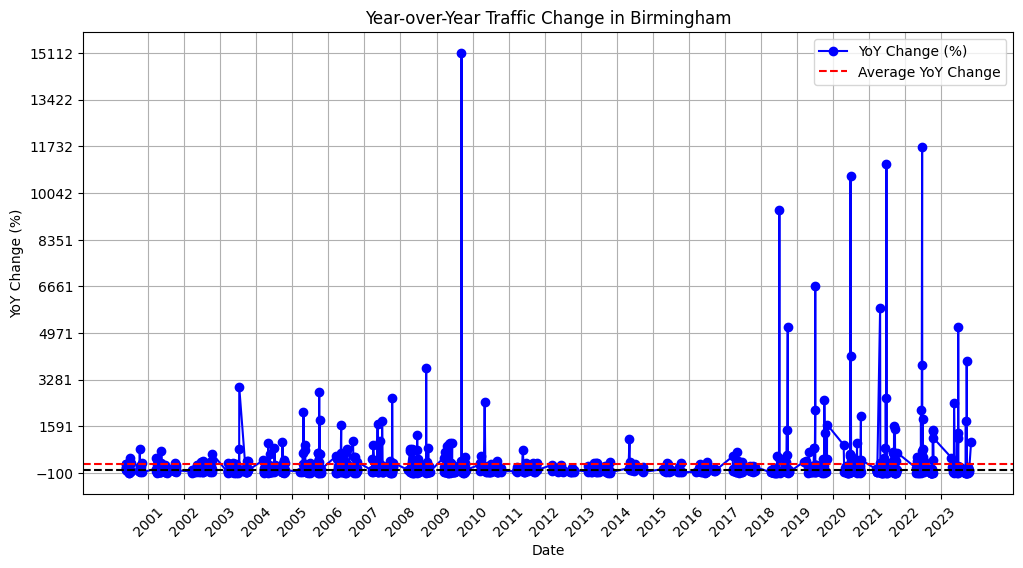

In [ ]:
# Year-over-Year Traffic Change in Birmingham
y_min = df_grouped["YoY_change"].min()
y_max = df_grouped["YoY_change"].max()

y_ticks = np.linspace(y_min, y_max, num=10)

years = pd.date_range(start=df_grouped["count_date"].min(), end=df_grouped["count_date"].max(), freq="YS")
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['count_date'], df_grouped['YoY_change'], marker='o', linestyle='-', color='blue', label="YoY Change (%)")
plt.axhline(0, color='black', linestyle='--')
plt.axhline(df_grouped['YoY_change'].mean(), color='red', linestyle='--', label="Average YoY Change")
plt.xticks(years, [str(y.year) for y in years], rotation=45)
plt.yticks(y_ticks)
plt.xlabel("Date")
plt.ylabel("YoY Change (%)")
plt.title("Year-over-Year Traffic Change in Birmingham")
plt.legend()
plt.grid(True)

# save as PDF
plt.savefig("output/birmingham_traffic_yoy_change.pdf", format="pdf", bbox_inches='tight', dpi=300)

plt.show()


In [25]:
df_grouped["quarter"] = df_grouped["count_date"].dt.to_period("Q")
quarterly_avg = df_grouped.groupby("quarter")["all_motor_vehicles"].mean()
df_grouped


,count_date,all_motor_vehicles,YoY_change,MoM_change,quarter
0,2000-03-17,93395.0,NaN,NaN,2000Q1
1,2000-03-21,11348.0,NaN,-87.849457,2000Q1
2,2000-03-22,23368.0,NaN,105.921748,2000Q1
3,2000-04-06,20052.0,NaN,-14.190346,2000Q2
4,2000-04-07,9390.0,NaN,-53.171753,2000Q2
...,...,...,...,...,...
1070,2023-10-09,28731.0,103.347725,495.337754,2023Q4
1071,2023-10-11,12900.0,-9.295458,-55.100762,2023Q4
1072,2023-10-12,6913.0,-55.534830,-46.410853,2023Q4
1073,2023-10-17,433.0,-0.459770,-93.736439,2023Q4


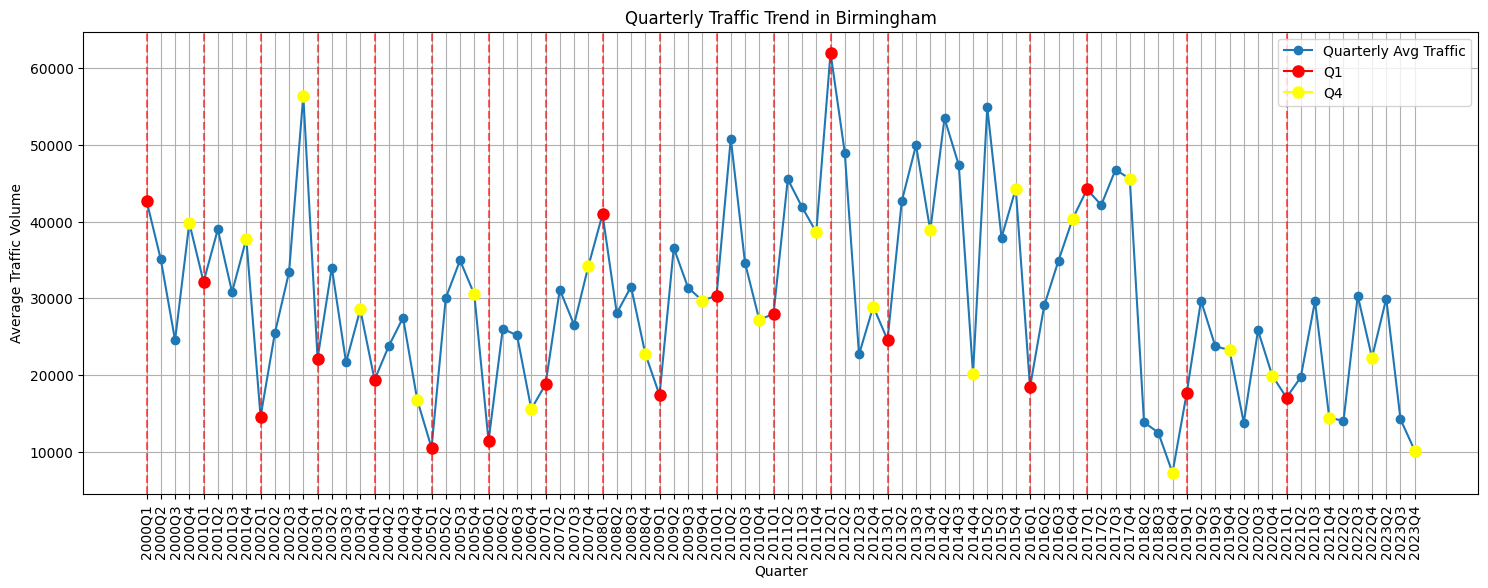

In [27]:

# 获取季度
quarters = quarterly_avg.index.astype(str)

# 识别 Q1,4 季度
q1_indices = [i for i, q in enumerate(quarters) if q.endswith("Q1")]
q4_indices = [i for i, q in enumerate(quarters) if q.endswith("Q4")]

plt.figure(figsize=(18, 6))
plt.plot(quarters, quarterly_avg.values, marker='o', linestyle='-', label="Quarterly Avg Traffic")

# 标记 Q1 为红色
for i in q1_indices:
    plt.plot(quarters[i], quarterly_avg.values[i], marker='o', color='red', markersize=8, label="Q1" if i == q1_indices[0] else "")
    
# 标记 Q4 为黄色
for i in q4_indices:
    plt.plot(quarters[i], quarterly_avg.values[i], marker='o', color='yellow', markersize=8, label="Q4" if i == q4_indices[0] else "")

# 画红色垂直线对应 Q1
for i in q1_indices:
    plt.axvline(x=quarters[i], color='red', linestyle='--', alpha=0.6)

plt.xlabel("Quarter")
plt.ylabel("Average Traffic Volume")
plt.title("Quarterly Traffic Trend in Birmingham")
plt.xticks(rotation=90)
plt.grid(True)
plt.legend()

plt.savefig("output/birmingham_traffic_quarterly_trend.pdf", format="pdf", bbox_inches='tight', dpi=300)
plt.show()




### 4.1 linear relationship

In [2]:
from utils import *

In [ ]:
# 读取数据
df_traffic_common = pd.read_csv("Traffic_common_data_cleaned.csv", low_memory=False)
df_gdp_common = pd.read_csv("Economic_common_data.csv.csv", low_memory=False)

# 计算 'Kent' 1997-2019 年的 GDP 和所有车辆数（cars_and_taxis）的相关性
compute_pearson_correlation(df_gdp_common, df_traffic_common, 
                            local_authority_name='Kent', 
                            common_years=range(1997, 2020), 
                            traffic_column='cars_and_taxis')


Kent 地区的 cars_and_taxis 和 GDHI 之间的 Pearson 相关系数: -0.0103, P 值: 0.0062


(-0.010276144231031629,
 0.006163410613582217,
        count_date  month  day  count_point_id direction_of_travel  year  hour  \
 0      2000-03-28      3   28            6036                   E  2000     7   
 1      2000-03-28      3   28            6036                   E  2000     8   
 2      2000-03-28      3   28            6036                   E  2000     9   
 3      2000-03-28      3   28            6036                   E  2000    10   
 4      2000-03-28      3   28            6036                   E  2000    11   
 ...           ...    ...  ...             ...                 ...   ...   ...   
 71035  2009-06-02      6    2          930826                   W  2009    14   
 71036  2009-06-02      6    2          930826                   W  2009    15   
 71037  2009-06-02      6    2          930826                   W  2009    16   
 71038  2009-06-02      6    2          930826                   W  2009    17   
 71039  2009-06-02      6    2          930826     

Kent 地区的 cars_and_taxis 和 GDHI 之间的 Pearson 相关系数: -0.0688, P 值: 0.0000


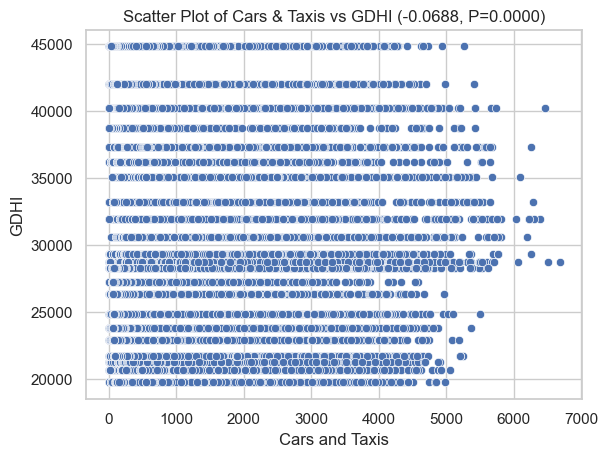

In [ ]:
# 读取数据
df_traffic_common = pd.read_csv("Traffic_common_data_cleaned.csv", low_memory=False)
df_gdp_common = pd.read_csv("Economic_common_data.csv.csv", low_memory=False)

# 计算 'Kent' 1997-2022 年的 GDP 和所有车辆数（cars_and_taxis）的相关性
corr, p_value, merged_df = compute_pearson_correlation(df_gdp_common, df_traffic_common, 
                                                       local_authority_name='Kent', 
                                                       common_years=range(1997, 2023), 
                                                       traffic_column='cars_and_taxis')

# 画散点图分析数据分布
sns.scatterplot(data=merged_df, x='cars_and_taxis', y='GDP')
plt.title(f'Scatter Plot of Cars & Taxis vs GDP ({corr:.4f}, P={p_value:.4f})')
plt.xlabel('Cars and Taxis')
plt.ylabel('GDP')
plt.show()



In [ ]:
# 读取数据
df_traffic_common = pd.read_csv("Traffic_common_data_cleaned.csv", low_memory=False)
df_gdp_common = pd.read_csv("Economic_common_data.csv.csv", low_memory=False)

# Excel 列号对应的列索引：W列到AI列，假设 W -> 22, X -> 23, ..., AI -> 34
traffic_column_indices = list(range(22, 35))  # 对应列序号，从W到AI

# 计算 Kent 地区在某范围年之间，GDP 和从 W 列到 AI 列之间的相关性，找出相关性最大的一项
all_results, best_column_pos, max_corr_pos, max_p_value_pos, best_column_abs, max_corr_abs, max_p_value_abs = compute_all_pearson_correlation(
    df_gdp_common, df_traffic_common, local_authority_name='Kent', 
    common_years=range(1997, 2016), traffic_column_indices=traffic_column_indices
)

# 输出结果
if best_column_pos is not None:
    print(f"相关性最大的列名（正数）是: {best_column_pos}, 相关系数: {max_corr_pos:.4f}, P 值: {max_p_value_pos:.4f}")
    print(f"相关性绝对值最大的列名是: {best_column_abs}, 相关系数: {max_corr_abs:.4f}, P 值: {max_p_value_abs:.4f}")


Kent 地区，在年份范围 range(1997, 2016) 中，各列的 Pearson 相关性如下：
列 pedal_cycles 的相关性为: -0.0166, P 值: 0.0001
列 two_wheeled_motor_vehicles 的相关性为: 0.0901, P 值: 0.0000
列 cars_and_taxis 的相关性为: 0.1696, P 值: 0.0000
列 buses_and_coaches 的相关性为: -0.1009, P 值: 0.0000
列 LGVs 的相关性为: 0.1884, P 值: 0.0000
列 HGVs_2_rigid_axle 的相关性为: 0.0727, P 值: 0.0000
列 HGVs_3_rigid_axle 的相关性为: 0.1358, P 值: 0.0000
列 HGVs_4_or_more_rigid_axle 的相关性为: 0.1104, P 值: 0.0000
列 HGVs_3_or_4_articulated_axle 的相关性为: -0.0801, P 值: 0.0000
列 HGVs_5_articulated_axle 的相关性为: 0.0327, P 值: 0.0000
列 HGVs_6_articulated_axle 的相关性为: 0.2490, P 值: 0.0000
列 all_HGVs 的相关性为: 0.1113, P 值: 0.0000
列 all_motor_vehicles 的相关性为: 0.1686, P 值: 0.0000
相关性最大的列名（正数）是: HGVs_6_articulated_axle, 相关系数: 0.2490, P 值: 0.0000
相关性绝对值最大的列名是: HGVs_6_articulated_axle, 相关系数: 0.2490, P 值: 0.0000


#### plot correlation for all cities

    local_authority_name  pearson_corr        p_value     column_name  \
67               Bedford      0.388599   4.384529e-77  cars_and_taxis   
50        Stoke-on-Trent      0.285374  9.298970e-180  cars_and_taxis   
39                 Derby      0.259123  1.955863e-114  cars_and_taxis   
57              Coventry      0.246663   2.007983e-90  cars_and_taxis   
15  Central Bedfordshire      0.242998   9.575023e-38  cars_and_taxis   
..                   ...           ...            ...             ...   
37           Westminster      0.020984   3.030295e-02  cars_and_taxis   
9      South Lanarkshire      0.011100   3.747850e-01  cars_and_taxis   
35            Wandsworth      0.007116   5.719118e-01  cars_and_taxis   
62            Darlington      0.004269   8.046061e-01  cars_and_taxis   
4                  Powys      0.001743   8.630163e-01  cars_and_taxis   

    abs_pearson_corr  
67          0.388599  
50          0.285374  
39          0.259123  
57          0.246663  
15      

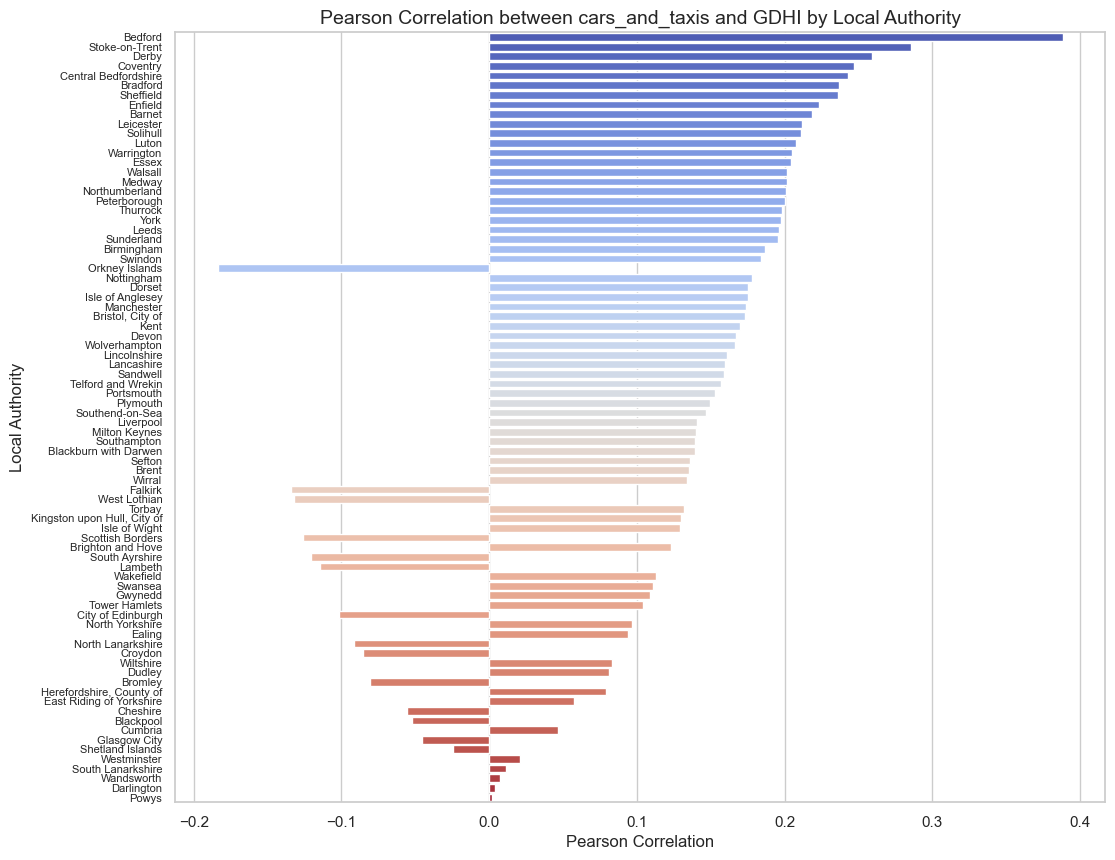

In [ ]:
# cars_and_taxis
column_name = 'cars_and_taxis'  # Change the column name as needed
plot_traffic_gdp_correlation(df_traffic_common, df_gdp_common, years_range=range(1997, 2016), column_name=column_name)


   local_authority_name  pearson_corr        p_value              column_name  \
67              Bedford      0.409842   2.358541e-86  HGVs_6_articulated_axle   
50       Stoke-on-Trent      0.376269  2.331990e-321  HGVs_6_articulated_axle   
44             Thurrock      0.351737  1.362677e-204  HGVs_6_articulated_axle   
21           Warrington      0.318758  6.715441e-233  HGVs_6_articulated_axle   
47    Brighton and Hove      0.317563  6.533459e-166  HGVs_6_articulated_axle   
..                  ...           ...            ...                      ...   
5          West Lothian     -0.032658   3.430849e-02  HGVs_6_articulated_axle   
20             Cheshire      0.029329   4.321791e-06  HGVs_6_articulated_axle   
13     Shetland Islands      0.025579   3.381813e-01  HGVs_6_articulated_axle   
0     North Lanarkshire      0.013270   3.002463e-01  HGVs_6_articulated_axle   
11         Glasgow City     -0.012935   2.257411e-01  HGVs_6_articulated_axle   

    abs_pearson_corr  
67  

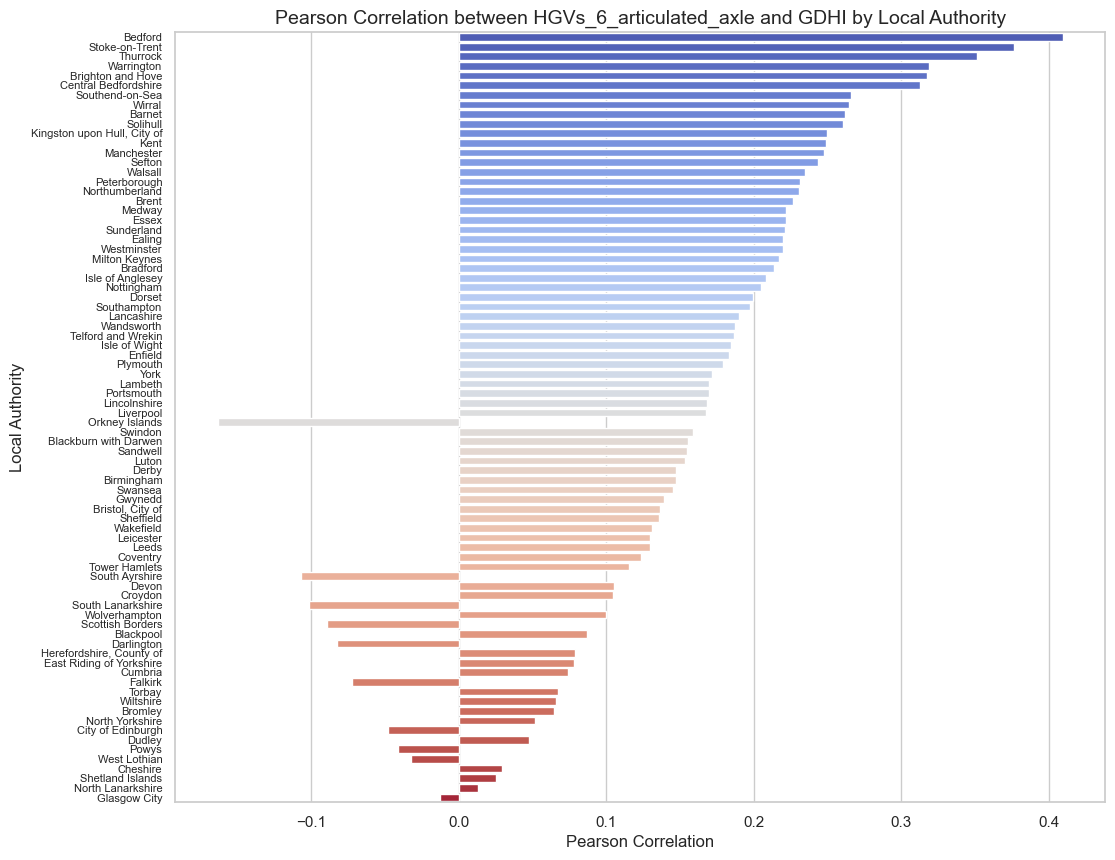

In [ ]:
# HGVs_6_articulated_axle
column_name = 'HGVs_6_articulated_axle'  # Change the column name as needed
plot_traffic_gdp_correlation(df_traffic_common, df_gdp_common, years_range=range(1997, 2016), column_name=column_name)